# Représentation graphique avec Matplotlib

![matplolib logo](./figures/matplotlib.png)

&nbsp;

<center>**Loic Gouarin**</center>
<center>11 juillet 2017</center>

&nbsp;

matplotlib permet

- de réaliser des graphes 1D et 2D à la Matlab,
- d'interagir avec les graphes,
- de sauvegarder les figures sous différents formats (*pdf*, *ps*, *png*, ...),
- d'intégrer facilement ces graphes dans des interfaces graphiques utilisateur.

## Utilisation de matplotlib dans un notebook

In [10]:
%matplotlib inline

## pyplot et pylab

pyplot est le module de matplotlib qui contient toutes les fonctionnalités permettant de faire des graphes

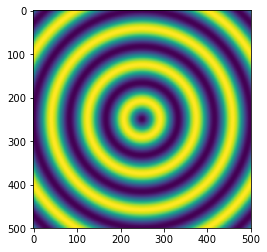

In [20]:
import matplotlib.pyplot as plt
import numpy as np

n = 500
x = np.linspace(-3*np.pi, 3*np.pi, n)
y = np.linspace(-3*np.pi, 3*np.pi, n)

x = x[np.newaxis, :]
y = y[:, np.newaxis]

plt.imshow(np.sin(np.sqrt(x**2 + y**2))**2)
plt.show()

pylab est un module matplotlib qui a pour but de recréer un environnement de type Matlab. Il contient donc de quoi faire des graphes et d'utiliser NumPy.

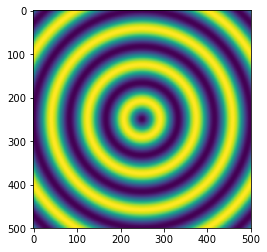

In [21]:
from pylab import *

n = 500
x = linspace(-3*pi, 3*pi, n)
y = linspace(-3*pi, 3*pi, n)

x = x[newaxis, :]
y = y[:, newaxis]

imshow(sin(sqrt(x**2 + y**2))**2)
plt.show()

#### Colormap

![colormap](./figures/plot_colormaps_1.png)

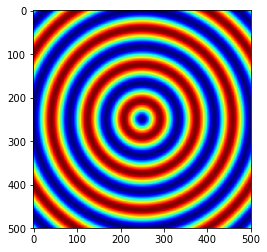

In [22]:
plt.imshow(np.sin(np.sqrt(x**2 + y**2))**2, cmap='jet')
plt.show()

## Notre modèle

Dans la suite, nous allons nous appuyer sur l'équation écrite en coordonnées polaires suivante

$$
r = e^{cos(a\theta)}-Acos(b\theta)+sin^B\left(\frac{\theta}{c}\right)
$$

où $\theta \in [0, 2R\pi]$ avec $R$ le nombre de révolutions.

La fonction Python s'écrit

In [11]:
def butterfly(theta, A, B, a, b, c):
    return np.exp(np.cos(a*theta)) - A*np.cos(b*theta) + np.sin(theta/c)**B

Nous prendrons les paramètres suivants

In [12]:
A = 2
B = 5
a = 1
b = 4
c = 30
R = 10
n = 10000
rotation = -np.pi/2

In [13]:
theta = np.linspace(0, R*2*np.pi, n)
r = butterfly(theta + rotation, A, B, a, b, c)

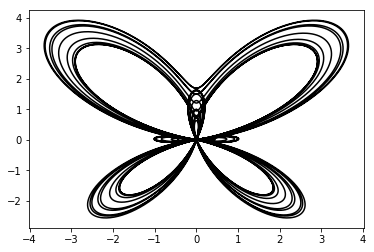

In [14]:
plt.plot(r*np.cos(theta), r*np.sin(theta), 'k')
plt.show()

On peut changer la taille de notre figure

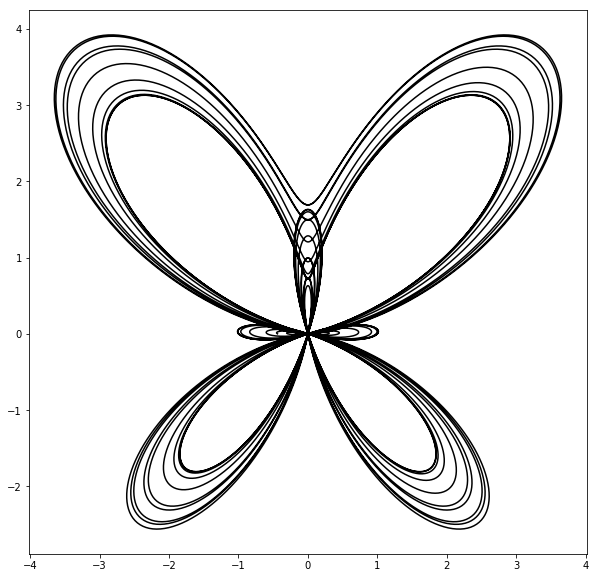

In [15]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(r*np.cos(theta), r*np.sin(theta), 'k')
plt.show()

**figure** comporte d'autres arguments

- **num**: numéro de la figure
- **figsize**: taille de la figure
- **dpi**: résolution de la figure
- **facecolor**: la couleur de fond de la figure
- **edgecolor**: la couleur du bord de la figure

## Ajouter un titre et des labels

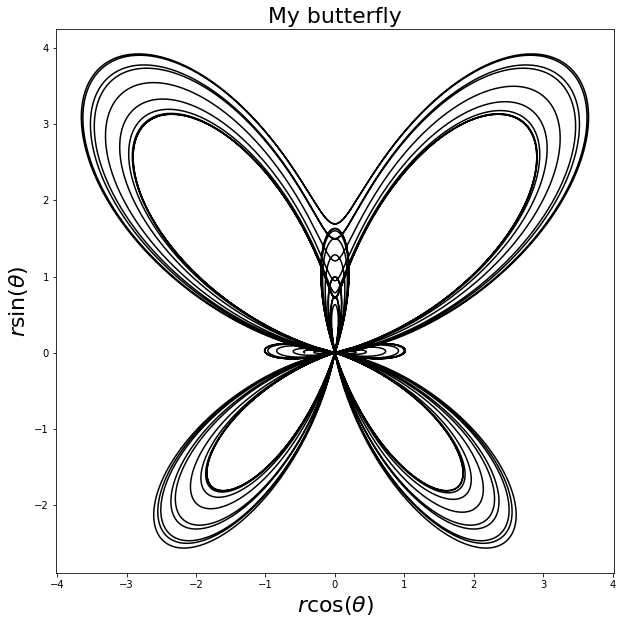

In [16]:
def set_title_and_label(ax, fontsize=22):
    ax.set_title("My butterfly", fontsize = 22)
    ax.set_xlabel("$r\cos(\\theta )$", fontsize = 22)
    ax.set_ylabel("$r\sin(\\theta)$", fontsize = 22)
    
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(r*np.cos(theta), r*np.sin(theta), 'k')
set_title_and_label(ax)
plt.show()

## Jouer avec les axes

Il est possible de définir les valeurs devant figurer sur l'axe ainsi que leur format en utilisant **xticks** ou **yticks**.

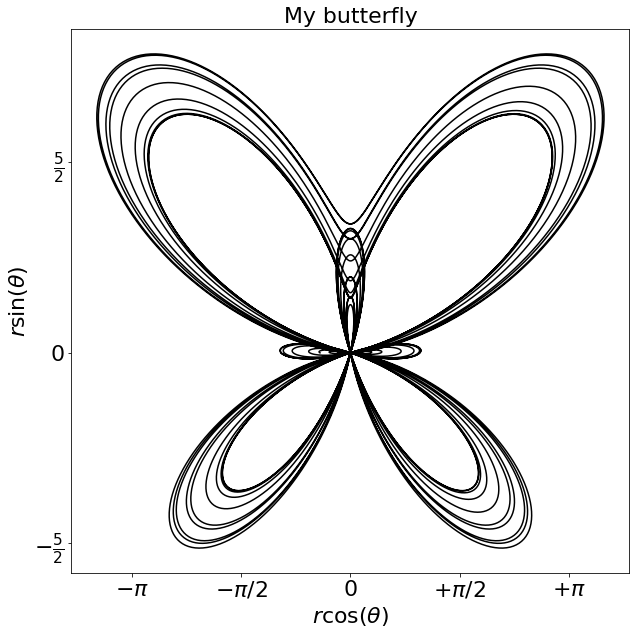

In [25]:
def set_ticks_label(ax, fontsize=22):
    ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
    ax.set_xticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontsize=22)
    ax.set_yticks([-2.5, 0, 2.5])
    ax.set_yticklabels([r'$-\frac{5}{2}$', r'$0$', r'$\frac{5}{2}$'], fontsize=22)

fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(r*np.cos(theta), r*np.sin(theta), 'k')
set_title_and_label(ax)
set_ticks_label(ax)
plt.show()

Il est possible de modifier également les marqueurs des axes en spécifiant leur nombre, leur taille, leur couleur, ...

Il existe deux types de marqueurs

- **minor**: marqueurs sans label
- **major**: marqueurs avec label

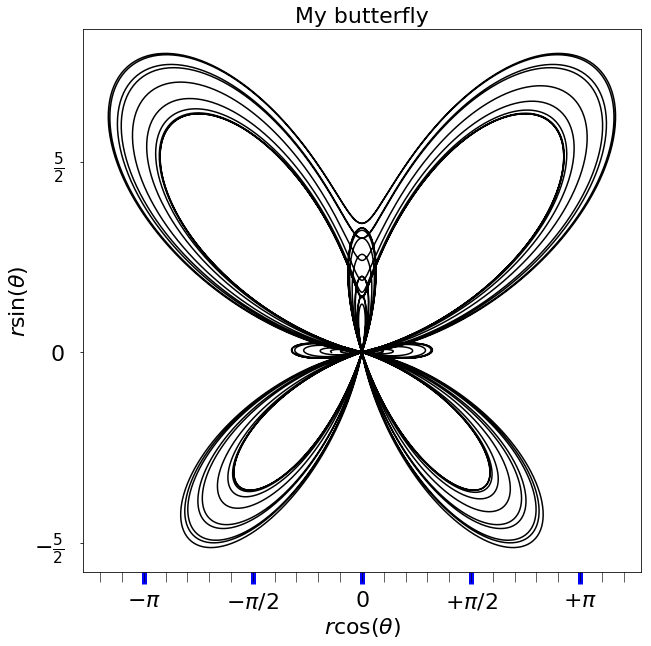

In [27]:
def set_ticks(ax):
    ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi/10))
    ax.tick_params(direction='out', pad=15)

    for tick in ax.xaxis.get_minor_ticks():
        tick.tick1line.set_markersize(10)    
        tick.tick2line.set_markersize(0)

    for tick in ax.xaxis.get_major_ticks():
        tick.tick1line.set_markersize(12)
        tick.tick1line.set_markeredgewidth(5)
        tick.tick1line.set_markeredgecolor('b')
        tick.tick2line.set_markersize(0)

fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(r*np.cos(theta), r*np.sin(theta), 'k')
set_title_and_label(ax)
set_ticks_label(ax)
set_ticks(ax)
plt.show()

On a différentes fonctions nous permettant de spécifier l'emplacement des marqueurs

<img src="files/figures/plot_ticks_1.png" style="width:80%;" />

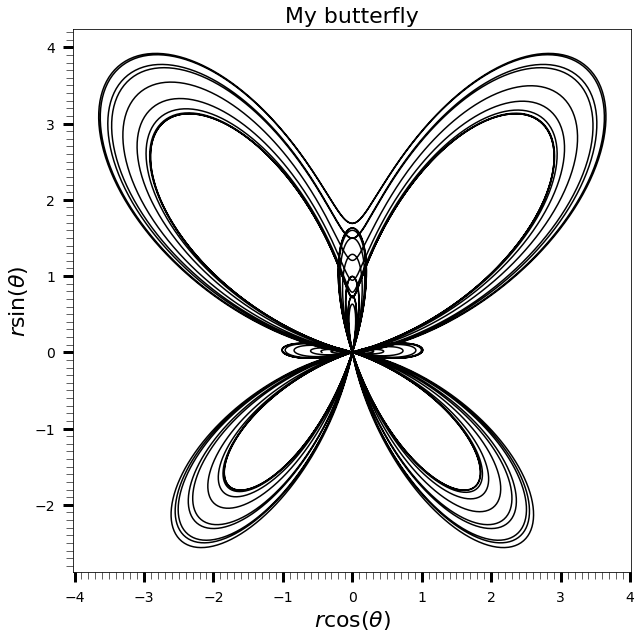

In [32]:
def set_ticks(ax):
    ax.tick_params(direction='out', pad=15)
    
    ax.yaxis.set_minor_locator(plt.MultipleLocator(.1))
    ax.yaxis.set_major_locator(plt.MultipleLocator(1.))

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_minor_locator(plt.MultipleLocator(.1))
        axis.set_major_locator(plt.MultipleLocator(1.))
        for tick in axis.get_minor_ticks():
            tick.tick1line.set_markersize(7)    

        for tick in axis.get_major_ticks():
            tick.tick1line.set_markersize(10)
            tick.tick1line.set_markeredgewidth(3)
            tick.label1.set_fontsize(14)

fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(r*np.cos(theta), r*np.sin(theta), 'k')
set_title_and_label(ax)
set_ticks(ax)
plt.show()

On peut également avoir besoin de déplacer les axes.

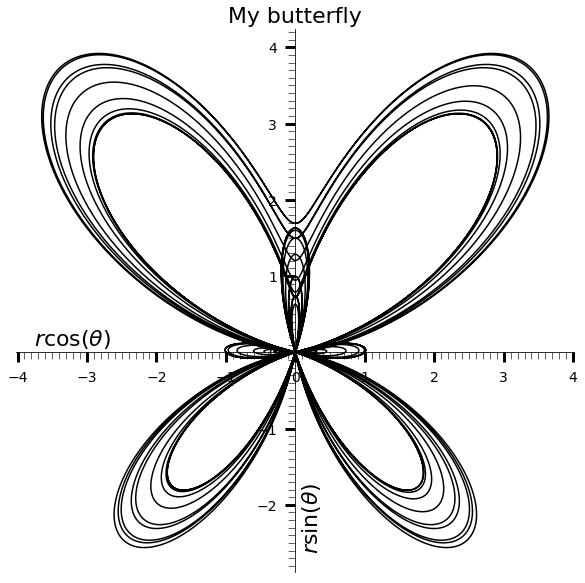

In [33]:
def move_axes(ax):
    ax.xaxis.set_label_coords(0.1, 0.45)
    ax.yaxis.set_label_coords(.55, 0.1)

    # on enlève les axes de droite et du haut
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # on met nos marqueurs sur l'axe du bas et celui de gauche
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # on définit leur position par rapport aux données
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['left'].set_position(('data', 0))

fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(r*np.cos(theta), r*np.sin(theta), 'k')
set_title_and_label(ax)
move_axes(ax)
set_ticks(ax)
plt.show()

## Colorier une partie de la figure

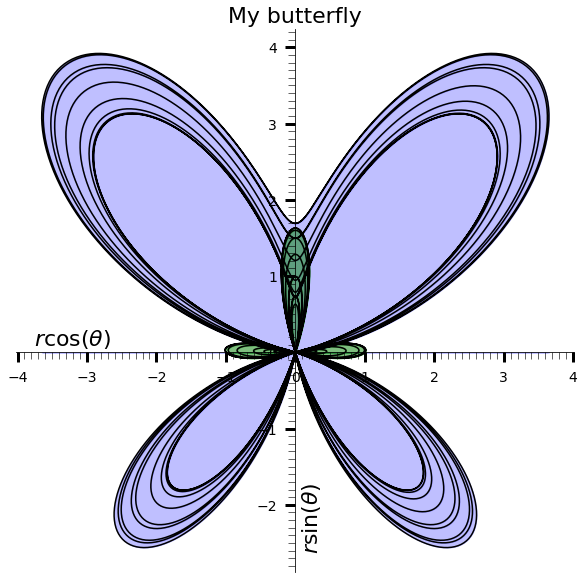

In [34]:
def fill(ax, r, theta):
    ind = np.where(r>0)
    ax.fill_between(r[ind]*np.cos(theta[ind]), r[ind]*np.sin(theta[ind]), color='b', alpha=.25)
    ind = np.where(r<0)
    ax.fill_between(r[ind]*np.cos(theta[ind]), r[ind]*np.sin(theta[ind]), color='g', alpha=.5)
    
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(r*np.cos(theta), r*np.sin(theta), 'k')
set_title_and_label(ax)
move_axes(ax)
set_ticks(ax)
fill(ax, r, theta)
plt.show()

## Annotations

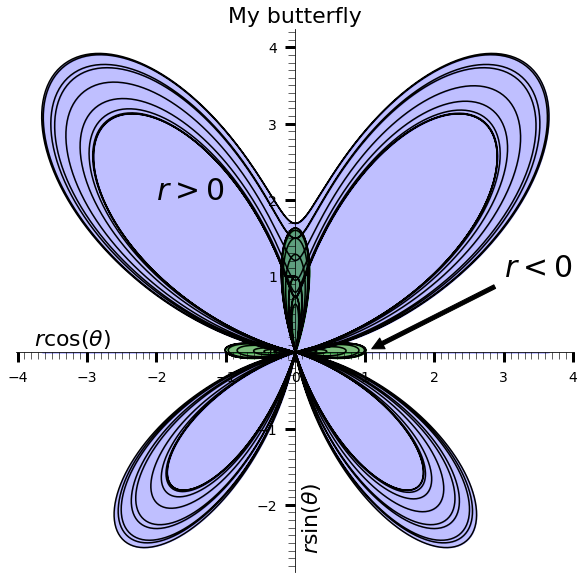

In [35]:
def annotate(ax):
    ax.text(-2, 2., '$r>0$', fontsize=30)

    ax.annotate('$r<0$', xy = (1, 0), xytext = (3, 1), arrowprops=
                 dict(facecolor = 'black', shrink = 0.05), fontsize=30)

fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(r*np.cos(theta), r*np.sin(theta), 'k')
set_title_and_label(ax)
move_axes(ax)
set_ticks(ax)
fill(ax, r, theta)
annotate(ax)
plt.show()

## subplot et axes

Il n'est pas rare d'avoir besoin d'afficher plusieurs figures indépendantes sur une même figure.
**matplotlib** offre deux façons de faire: **subplot** ou **axes**.

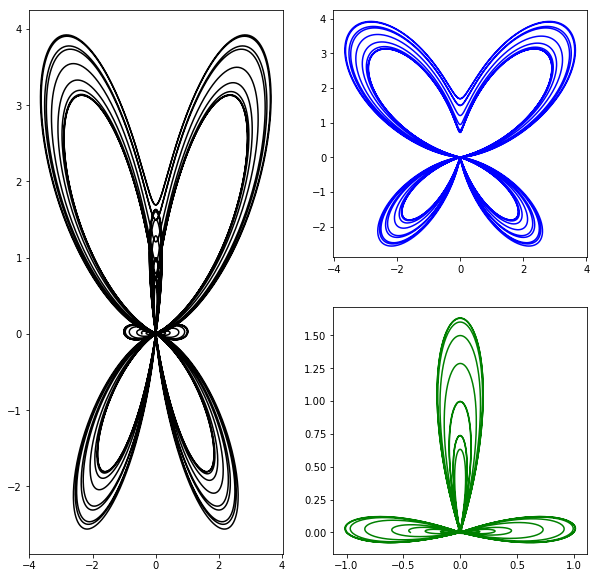

In [42]:
plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.plot(r*np.cos(theta), r*np.sin(theta), 'k')

plt.subplot(2,2,2)
ind = np.where(r>0)
plt.plot(r[ind]*np.cos(theta[ind]), r[ind]*np.sin(theta[ind]), color='b')

plt.subplot(2,2,4)
ind = np.where(r<0)
plt.plot(r[ind]*np.cos(theta[ind]), r[ind]*np.sin(theta[ind]), color='g')
plt.show()

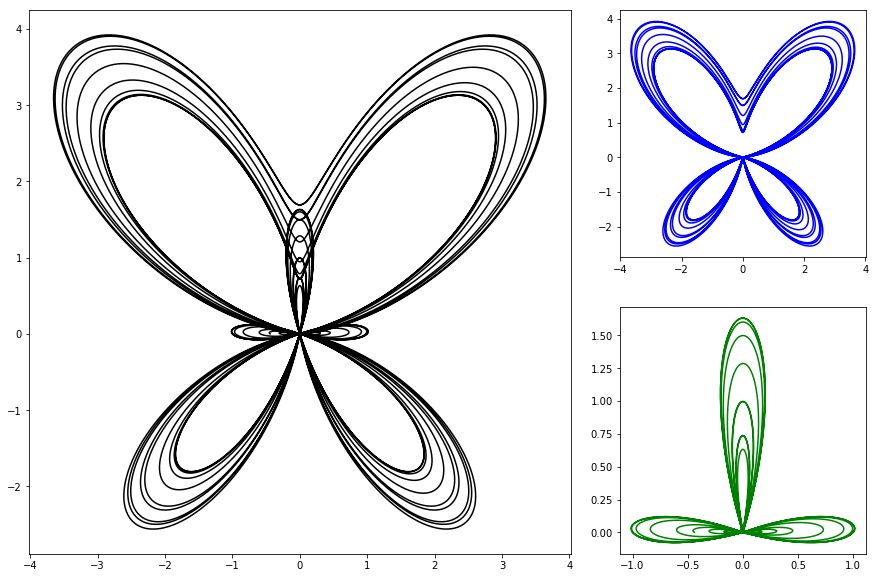

In [43]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(15, 10))
G = gridspec.GridSpec(2, 3)

plt.subplot(G[:, :2])
plt.plot(r*np.cos(theta), r*np.sin(theta), 'k')

plt.subplot(G[0, 2])
ind = np.where(r>0)
plt.plot(r[ind]*np.cos(theta[ind]), r[ind]*np.sin(theta[ind]), color='b')

plt.subplot(G[1, 2])
ind = np.where(r<0)
plt.plot(r[ind]*np.cos(theta[ind]), r[ind]*np.sin(theta[ind]), color='g')
plt.show()

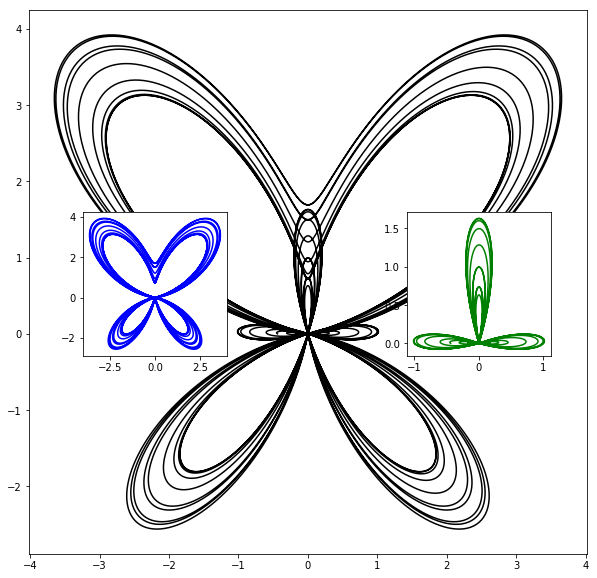

In [45]:
plt.figure(figsize=(10, 10))

plt.plot(r*np.cos(theta), r*np.sin(theta), 'k')

plt.axes([.2, .4, .2, .2])
ind = np.where(r>0)
plt.plot(r[ind]*np.cos(theta[ind]), r[ind]*np.sin(theta[ind]), color='b')

plt.axes([.65, .4, .2, .2])
ind = np.where(r<0)
plt.plot(r[ind]*np.cos(theta[ind]), r[ind]*np.sin(theta[ind]), color='g')
plt.show()

## Ajouter une légende

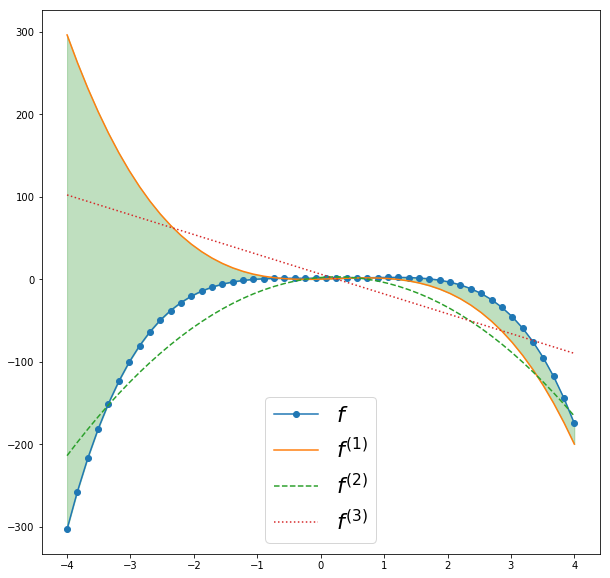

In [48]:
x = np.linspace(-4., 4., 50)

fig, ax = plt.subplots(figsize=figsize)
ax.plot(x, -x**4 + x**3 + x**2 + 1, 'o-')
ax.plot(x, -4*x**3 + 3*x**2 + 2*x, '-')
ax.plot(x, -12*x**2 + 6*x + 2, '--')
ax.plot(x, -24*x + 6, ':')
ax.fill_between(x, -x**4 + x**3 + x**2 + 1, -4*x**3 + 3*x**2 + 2*x, color='g', alpha=.25)
ax.legend(['$f$', '$f^{(1)}$', '$f^{(2)}$'
           , '$f^{(3)}$'], loc='lower center', fontsize=22)
plt.savefig('1D_legende.pdf')
plt.show()

## Autres figures

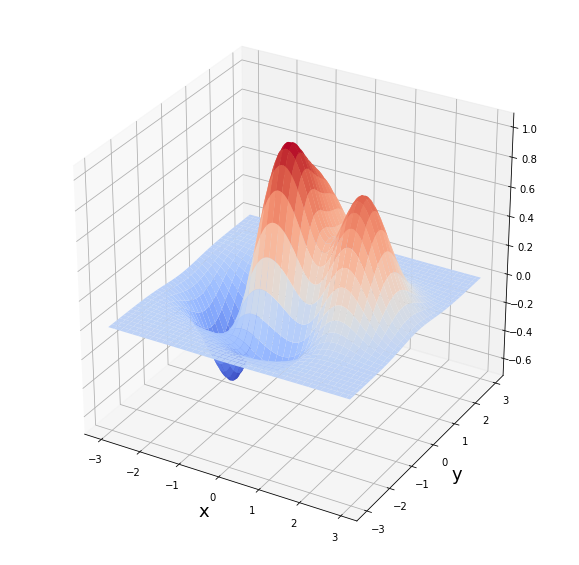

In [48]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def f(x,y):
    return (1- x/2 + x**5 + y**3)*np.exp(-x**2-y**2)

dx, dy = 0.05, 0.05
x = np.arange(-3.0, 3.0, dx)
y = np.arange(-3.0, 3.0, dy)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
plt.show()

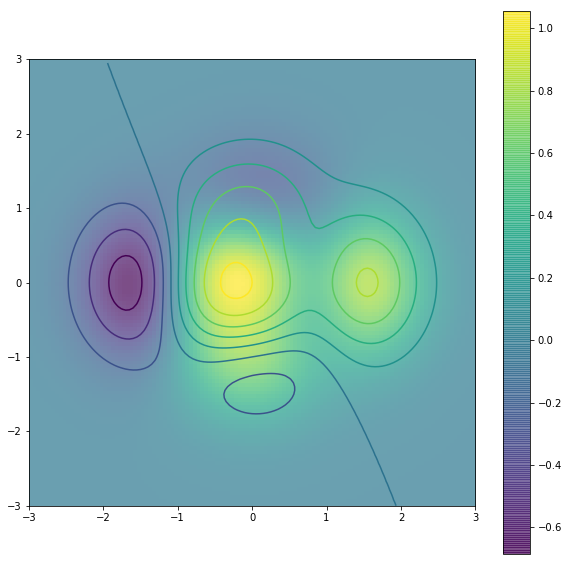

In [49]:
fig = plt.figure(figsize=(10, 10))
c = plt.contour(X, Y, Z, 10)
im = plt.imshow(Z, extent=(-3,3,-3,3))
im.set_alpha(0.7)
plt.colorbar()
plt.savefig('2D_contour.pdf')

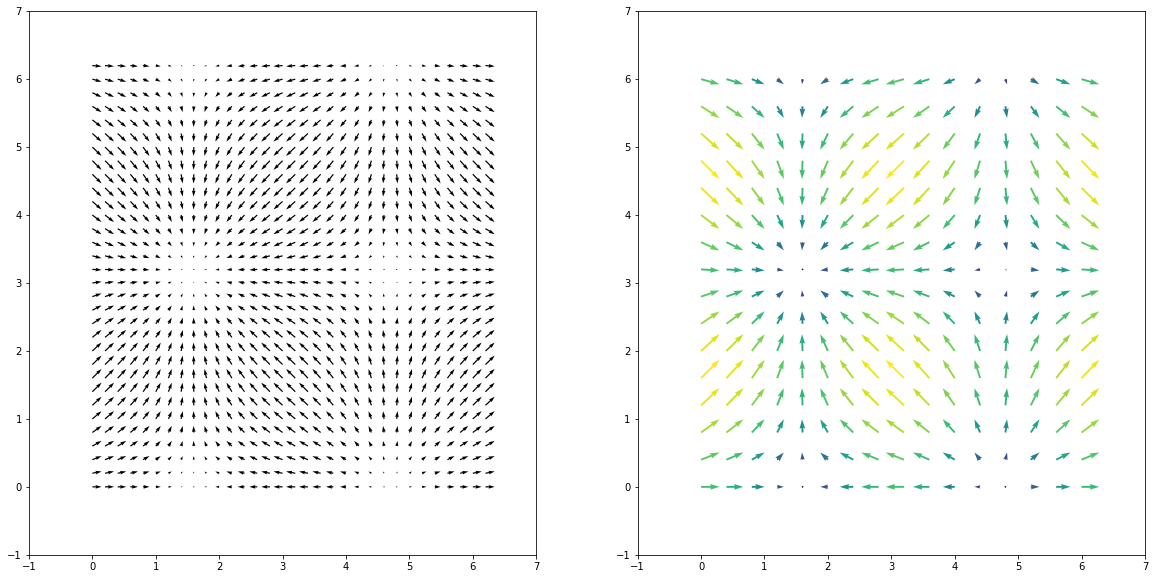

In [50]:
X,Y = np.meshgrid( np.arange(0,2*np.pi,.2),
                   np.arange(0,2*np.pi,.2) )
U = np.cos(X)
V = np.sin(Y)
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.quiver( X, Y, U, V)
plt.axis([-1, 7, -1, 7])

plt.subplot(1, 2, 2)
C = np.sqrt(U**2 + V**2)
N=2
plt.quiver( X[::N, ::N], Y[::N, ::N], U[::N, ::N], 
            V[::N, ::N], C[::N, ::N])
plt.axis([-1, 7, -1, 7])
plt.show()

## Animations

Il est également possible de faire des films rapidement en donnant la fonction qui fait la mise à jour, en spécifiant le nombre de frames par seconde, ...

<IPython.core.display.Javascript object>


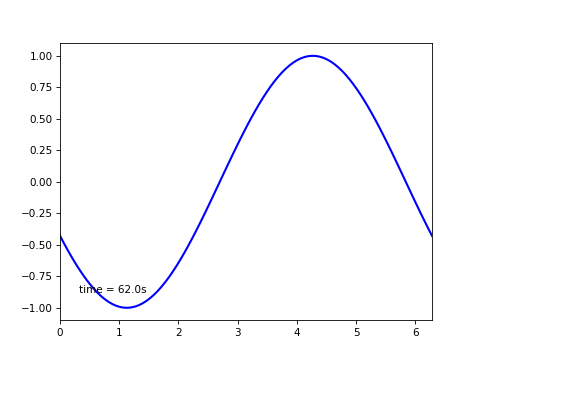

In [24]:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, 2.*np.pi), ylim=(-1.1, 1.1))

theta = np.linspace(0, 2*np.pi, 100)

# Creation des différents elements constituants la figure
sinplot, = ax.plot([], [], color='b', linewidth=2)

time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.1, '', transform=ax.transAxes)
time_text.set_text('')

def animate(i):
    sinplot.set_data(theta, np.sin(theta+i/(2*np.pi)))
    time_text.set_text(time_template%(i))
    return sinplot, time_text

anim = animation.FuncAnimation(fig, animate, np.arange(1, 100),
    interval=25, repeat=True)
#anim.save('sinus.mp4')
plt.show()

In [23]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom.css").read()
    return HTML(styles)
css_styling()